# introduction to pandas

* Pandas is a fast, powerful, flexible and easy to use open source data analysis and data manipulation library built on top of the Python programming language.
* It is a high-level data manipulation tool developed by Wes McKinney in 2008.
* It is built on the Numpy package and its key data structure is called DataFrame.
* It is used for data manipulation, data analysis, data cleaning and data visualization.
* It is widely used in data science, machine learning and data analytics.
* It can handle large datasets and is very fast.
* It can read data from various file formats like CSV, Excel, JSON, SQL, HTML, etc.

1. [Create Data Frame](#create-a-dataframe)
2. [Read CSV File](#read-a-csv-file)
3. [Slices and Indexing](#Slicing-and-indexing-a-dataframe)
4. [Selecting a Column](#Select-a-column)
5. [Basic Statistics](#basic-statistics)
6. [Apply a Function](#apply-a-function)
7. [Masking](#masking)


In [1]:
import pandas as pd

### Create a Dataframe

In [2]:
# create a dataframe
df = pd.DataFrame({
    'name': ['John', 'Smith', 'Paul'],
    'age': [23, 45, 32],
    'city': ['New York', 'Chicago', 'Los Angeles']
})

In [3]:
df

,name,age,city
0,John,23,New York
1,Smith,45,Chicago
2,Paul,32,Los Angeles


### Read a CSV File

In [4]:
iris = pd.read_csv('../assets/iris.csv')

In [5]:
# head and tail
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Slicing and indexing a dataframe

In [6]:
# Slice a dataframe
iris.iloc[0:5, 0:2]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [7]:
iris.loc[0:5, 'sepal_length':'petal_width']

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


## Select a Column

In [8]:
iris.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [9]:
iris['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [10]:
iris[['species']]

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [11]:
# Drop a column
iris.drop(columns=['species'])

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# finding missing values
iris.isnull().sum()

## Basic Statistics

In [77]:
iris.petal_length.describe()

In [78]:
iris.petal_length.quantile([0.25, 0.75])

In [79]:
# min and max, median, mean
iris.petal_length.min(), iris.petal_length.max(), iris.petal_length.median(), iris.petal_length.mean()

In [80]:
iris[["sepal_length", "petal_width"]].corr()

In [81]:
iris[["petal_length", "petal_width"]].corr()

## Apply Function

apply is used to apply a function along the axis of a DataFrame or on values of Series.

In [6]:
iris.apply(lambda x: x.max())

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

## Masking

Masking is used to filter data based on some condition.

In [12]:
# for example filter data where petal_length is greater than 1.5
mask = iris.petal_length > 1.5
mask

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: petal_length, Length: 150, dtype: bool

In [13]:
mask.sum()

113

In [16]:
mask.shape[0] - mask.sum()

37

## Group-by

In [17]:
iris.groupby(['species']).max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [18]:
df = iris.groupby(['species']).agg({'sepal_length':['mean','min','max'],'sepal_width':'count'})
df

sepal_length           sepal_width
                   mean  min  max       count
species                                      
setosa            5.006  4.3  5.8          50
versicolor        5.936  4.9  7.0          50
virginica         6.588  4.9  7.9          50

In [19]:
groupings = iris.groupby(['species'])

In [20]:
groupings.get_group('setosa').head()

/var/folders/c9/hdy5dxw96bv2pbcnscrcgglm0000gn/T/ipykernel_95276/921954640.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  groupings.get_group('setosa').head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
groupings.max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [22]:
groupings.apply(lambda x: x.max())

/var/folders/c9/hdy5dxw96bv2pbcnscrcgglm0000gn/T/ipykernel_95276/2371931471.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  groupings.apply(lambda x: x.max())


,sepal_length,sepal_width,petal_length,petal_width,species
species,,,,,
setosa,5.8,4.4,1.9,0.6,setosa
versicolor,7.0,3.4,5.1,1.8,versicolor
virginica,7.9,3.8,6.9,2.5,virginica


In [23]:
groupings.filter(lambda x: x['petal_length'].max() <5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Plotting

<Axes: ylabel='Frequency'>

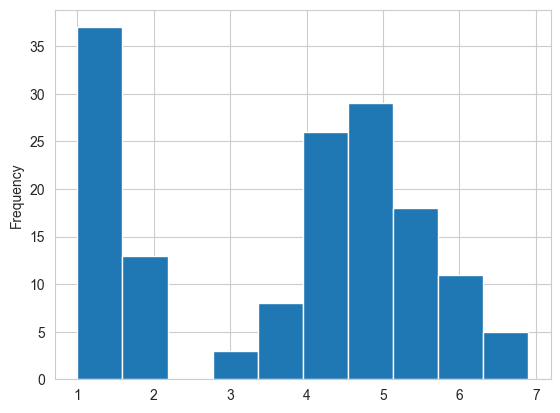

In [4]:
# Histogram
iris.petal_length.plot(kind='hist')

<Axes: title={'center': 'petal_length'}, xlabel='species'>

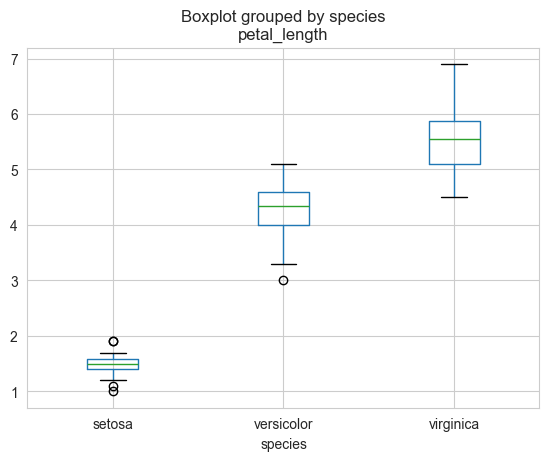

In [5]:
# Boxplot
iris.boxplot(column='petal_length', by='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

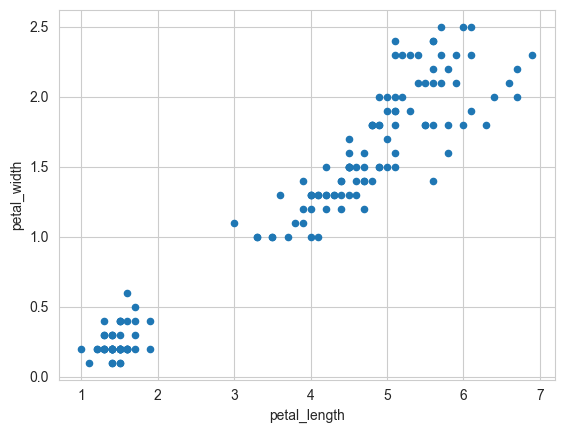

In [6]:
# Scatterplot
iris.plot(kind='scatter', x='petal_length', y='petal_width')